In [1]:
%matplotlib inline

import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker, IPython.display as ipd
import librosa, librosa.display

# Generate a sound that resembles violin

The code below is a simplified version of the [Karplus-Strong string synthesis algorithm](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). It is covered in Week 1 of [a really good DSP MOOC on Coursera](https://www.coursera.org/learn/dsp) (lecture 1.3.b).

This is what the full Karplus-Strong algorithm looks like

![Karplus-Strong diagram from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Karplus-strong-schematic.svg/519px-Karplus-strong-schematic.svg.png)

You can find more information on the algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis) which is where the above image was taken from.

We start with a sawtooth wave. It tries to simulate the mechanics of plucking a string.

> "When you drag a bow across the string of the violin, the little teeth in the bow's strings are picking the string, displacing it and then when the tension gets too big, the strings jumps back in the original position."  - [lecture 1.3.b](https://www.coursera.org/learn/dsp)

Let's first generate the finite support of our signal. It will be 100 samples in length. The idea is to repeat it over time attenuating it by some decay factor, say 0.95.

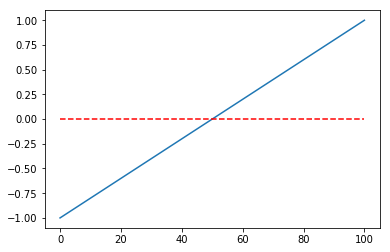

In [2]:
t = np.linspace(0, 100, num=100)
support = (t - 50) / 50
ax = plt.subplot()
ax.plot(t, support)
ax.plot(t, [0]*100, 'r--')

We can use a sampling rate of 16 khz and let's generate a signal that lasts 1 second.

In [3]:
sr = 16000
decay = 0.95

signal = support

for i in range(sr // 100 - 1):
    signal = np.hstack((signal, support * decay**i))

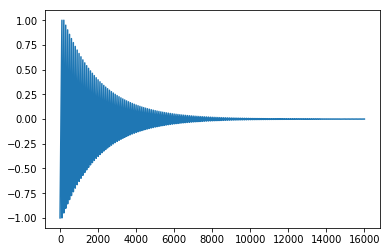

In [4]:
plt.plot(signal)

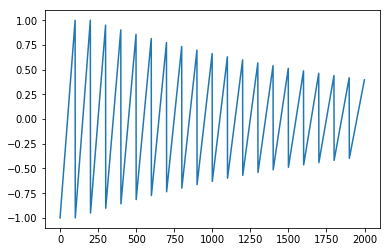

In [5]:
plt.plot(signal[:2000])

In [6]:
ipd.Audio(signal, rate=16000)

Doesn't sound half bad! There is a variation on this algorithm that does even better and should produce a sound resembling the harpsichord.

Instead of starting with a saw tooth wave, the algorithm prescribes using uniformly sampled random values. Also, the decay factor should be a bit lower, around 0.9.

<StemContainer object of 3 artists>

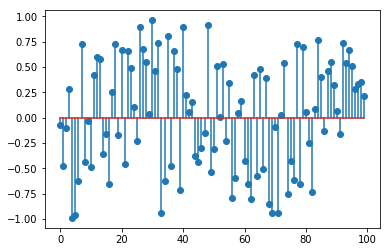

In [7]:
support = np.random.rand(100) * 2 - 1
plt.stem(support, markerfmt='o', bottom=0)

In [8]:
sr = 16000
decay = 0.9

signal = support

for i in range(sr // 100 - 1):
    signal = np.hstack((signal, support * decay**i))

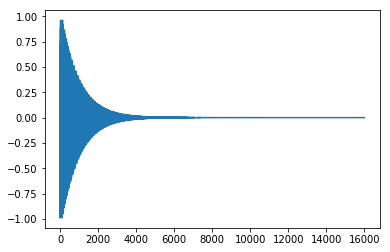

In [9]:
plt.plot(signal)

In [10]:
ipd.Audio(signal, rate=16000)